# Εξόρυξη Δεδόμενων





# Ον/Επ: Αλέξανδρος Καπενής 



In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import scipy as sp
import matplotlib.pyplot as plt #main plotting tool for python
import matplotlib as mpl
import seaborn as sns
from sklearn.utils import shuffle
import math
from sklearn.metrics import mean_squared_error 
import scipy.sparse as sp_sparse
from sklearn.metrics.pairwise import cosine_similarity
from datetime import datetime
import scipy.sparse.linalg as sp_linalg
import sklearn.cluster as sk_cluster
import sklearn.metrics as metrics
import sklearn.feature_extraction.text as sk_text

# Βήμα 1:επεξεργασία των δεδομένων

In [2]:
testdf=pd.read_csv('train.csv')

In [3]:
testdf

,id,user_id,joke_id,Rating
0,31030_110,31030,110,2.750
1,16144_109,16144,109,5.094
2,23098_6,23098,6,-6.438
3,14273_86,14273,86,4.406
4,18419_134,18419,134,9.375
...,...,...,...,...
1092054,9517_132,9517,132,3.156
1092055,27767_118,27767,118,-1.594
1092056,10580_81,10580,81,2.000
1092057,31007_119,31007,119,8.906


Αφαιρουμε 1 απο τους χρηστες και τα αστεια για τα χρησιμοποιησουμε σαν index αργοτερα

In [4]:
testdf['user_id'] = (testdf['user_id'] -1)
testdf['joke_id'] = (testdf['joke_id'] -1)

In [5]:
testdf


,id,user_id,joke_id,Rating
0,31030_110,31029,109,2.750
1,16144_109,16143,108,5.094
2,23098_6,23097,5,-6.438
3,14273_86,14272,85,4.406
4,18419_134,18418,133,9.375
...,...,...,...,...
1092054,9517_132,9516,131,3.156
1092055,27767_118,27766,117,-1.594
1092056,10580_81,10579,80,2.000
1092057,31007_119,31006,118,8.906


Κανουμε αναδιαταξη και τα χωριζουμε

In [6]:
sh_test_df=shuffle(testdf , random_state=2021)

In [7]:
test = sh_test_df.iloc[:10000,:]
train = sh_test_df.iloc[10001:,:]

# Βήμα 2: 

Για να πάρουμε τον μέσο όρο για κάθε χρήστη θα κάνουμε ένα groopby ανά χρήση και θα πάρουμε έτσι το μέσο όρο του καθενός και για κάθε χρήση στο test μέρος θα δώσουμε το μέσο όρο

In [10]:
now = datetime.now()
by_user_AV=train.groupby(by=["user_id"]).mean()
after=datetime.now()
delta=after-now
print(delta)

0:00:00.104025


Ομοια θα κανουμε και για τα αστεια αλλα αυτη τη φορα θα κανουμε groopby αστειο και για καθε αστειο στο test θα δοσουμε το μεσο ορο

In [11]:
now = datetime.now()
by_joke_AV=train.groupby(by=["joke_id"]).mean()
after=datetime.now()
delta=after-now
print(delta)

0:00:00.081010


In [12]:
by_user_AV=by_user_AV.drop(['joke_id'],axis='columns')
by_user_AV=by_user_AV.rename(columns={"Rating": "User_AV"})
by_user_AV

,User_AV
user_id,
0,2.502220
1,4.456565
2,-5.544167
3,2.993000
4,-1.723889
...,...
40858,3.942385
40859,-0.454778
40860,-1.919571


In [13]:
test=test.merge(by_user_AV,on='user_id')

In [14]:
by_joke_AV=by_joke_AV.drop(['user_id'],axis=1)
by_joke_AV=by_joke_AV.rename(columns={"Rating": "joke_AV"})
by_joke_AV

,joke_AV
joke_id,
0,-2.243212
1,-1.933326
2,-0.669190
3,-0.606896
4,-1.414191
...,...
134,2.446052
135,0.149427
136,1.843784


In [15]:
test=test.merge(by_joke_AV,on='joke_id')
test

,id,user_id,joke_id,Rating,User_AV,joke_AV
0,39893_22,39892,21,-0.281,1.522214,3.505219
1,23075_22,23074,21,3.156,5.007926,3.505219
2,23172_22,23171,21,2.906,1.376034,3.505219
3,7283_22,7282,21,-2.938,-1.043389,3.505219
4,33971_22,33970,21,2.656,1.577067,3.505219
...,...,...,...,...,...,...
9995,552_63,551,62,-9.000,-4.695184,1.777240
9996,203_21,202,20,7.844,6.081095,2.169295
9997,18_21,17,20,2.656,-0.933760,2.169295
9998,407_70,406,69,8.375,0.968846,2.849964


In [16]:
realVals = test.Rating
predictedVals = test.User_AV

UArmse = mean_squared_error(realVals, predictedVals, squared = False)
UArmse

4.52416766013762

In [17]:
y_true = test.Rating
y_pred = test.joke_AV

JArmse = mean_squared_error(y_true, y_pred, squared = False)
JArmse

5.049905740176774

Για τους δυο αλγοριθμους των μεσων βαθμολογιων εχουμε RMSE= 4.52416766013762 για το μεσο ορο των χρηστων και RMSE= 5.049905740176774 για το μεσο ορο των αστειων 

#  Βήμα 3:

Αρχικα θα αλλαξουμε τις μηδενικες βαθμολογιες για να μη τις χασουμε στον αραιο πινακα ,σε πολυ μικρες 

In [18]:
train = train.drop("id",axis=1)

In [19]:

train=train.sort_values('joke_id')


In [20]:
train=train.set_index("joke_id")
train

,user_id,Rating
joke_id,,
0,341,-8.906
0,277,-6.500
0,229,-9.156
0,349,1.469
0,81,-7.281
...,...,...
138,10484,0.750
138,33636,2.188
138,38377,0.781


In [21]:
train.dtypes

user_id      int64
Rating     float64
dtype: object

In [22]:
(train['Rating']==0).sum()

2311

In [23]:
(train['Rating']==10^-15).sum()

1005

In [24]:
train['Rating'].replace(to_replace=0,value=10^-15,inplace=True)

In [25]:
(train['Rating']==0).sum()

0

In [26]:
(train['Rating']==10^-15).sum()

3316

In [27]:
train=train.reset_index()
train

,joke_id,user_id,Rating
0,0,341,-8.906
1,0,277,-6.500
2,0,229,-9.156
3,0,349,1.469
4,0,81,-7.281
...,...,...,...
1082053,138,10484,0.750
1082054,138,33636,2.188
1082055,138,38377,0.781
1082056,138,28445,8.250


Δημιουργουμε τον αραιο πινακα και οριζουμε τον αλγοριθμο UCF

In [28]:
Ru= sp_sparse.lil_matrix((139,40863))
Ru[train.joke_id,train.user_id]=train.Rating

In [29]:
def UCF(user,joke,k,X):
    
    mtcu=sp_sparse.csc_matrix(X)
    su=mtcu[joke].getnnz(axis=0) #
    u=np.where(su != 0)[0]       # users that rate the joke
    x=len(u)
    dataset = pd.DataFrame() # για να βρω την προβλεψη χρισιμοποιησα dataframe 
    dataset["users"]=u       # κραταω τους χρηστες για index
    cos_sim=cosine_similarity(mtcu.T[user],mtcu.T[u[0:x]],dense_output=False)
    cos_sim=cos_sim.todense()# αφου βρισκω την ομοιοτητα των χρηστων την
    cos_simd=cos_sim.tolist()# μετατρεπω σε λιστα για να το βαλω στο dataFrame
    
    rt=X[joke,u[:]].todense()# με τον ιδιο τροπο παιρνω και τη βαθμολογια του 
    rating=rt.tolist()       # χρηστη για να υπολογισω την προβλεψη
    
    dataset["rating"]=np.resize(rating,len(dataset)) # βαθμολογια
    
    dataset["cos_sim"]=np.resize(cos_simd,len(dataset)) # προβλεψη
    
    dataset= dataset.sort_values(by=["cos_sim"],ascending=False)# ταξινομω το dataset 
    dataset=dataset.reset_index()
    dataset=dataset.drop(["index"],axis=1)
    
    if(dataset.loc[0,'cos_sim']>0.99): # αφαιρω το πρωτο αν ειναι ενα
        dataset= dataset.iloc[1:,:]    # δε θελω τον χρηστη που συγκρινω
    
    if len(dataset)>k:                #κραταω τους κ ομοιους 
        dataset = dataset.iloc[:k,:]
    
    # υπολογιζω την ομοιοτητα επι την βαθμολογια     
    dataset['numer']=dataset.apply(lambda row: (row['cos_sim']*row['rating']),axis=1)   
    #βρισκω τα αθροισματα 
    rP=dataset.numer.sum()
    Ss=dataset.cos_sim.sum()
    
    PR=rP/Ss # predicted value
   
    del dataset
    
    return(PR)

In [31]:
now = datetime.now()
x=UCF(17,20,5,Ru)
after=datetime.now()
delta=after-now
print(x,delta)

-0.8033017039432313 0:00:00.074360


Για να αποθηκευσω της προβλεψεις της UCF πηρα ενα αντιγραφω του test 

In [32]:
testUCF=pd.DataFrame()
testUCF["user_id"]=test["user_id"]
testUCF["joke_id"]=test["joke_id"]
testUCF["Rating"]=test["Rating"]
testUCF

,user_id,joke_id,Rating
0,39892,21,-0.281
1,23074,21,3.156
2,23171,21,2.906
3,7282,21,-2.938
4,33970,21,2.656
...,...,...,...
9995,551,62,-9.000
9996,202,20,7.844
9997,17,20,2.656
9998,406,69,8.375


In [33]:
now = datetime.now()
testUCF["UCF_10"]=testUCF.apply(lambda row: UCF(row['user_id'],row['joke_id'],10,Ru),axis=1)
after=datetime.now()
delta=after-now
print(delta)

0:09:13.215115


In [34]:
now = datetime.now()
testUCF["UCF_25"]=testUCF.apply(lambda row: UCF(row['user_id'],row['joke_id'],25,Ru),axis=1)
after=datetime.now()
delta=after-now
delta

datetime.timedelta(seconds=538, microseconds=366620)

In [35]:
now = datetime.now()
testUCF["UCF_50"]=testUCF.apply(lambda row: UCF(row['user_id'],row['joke_id'],50,Ru),axis=1)
after=datetime.now()
delta=after-now
delta

datetime.timedelta(seconds=544, microseconds=463806)

In [36]:
now = datetime.now()
testUCF["UCF_75"]=testUCF.apply(lambda row: UCF(row['user_id'],row['joke_id'],75,Ru),axis=1)
after=datetime.now()
delta=after-now
delta

datetime.timedelta(seconds=553, microseconds=314167)

In [37]:
now = datetime.now()
testUCF["UCF_100"]=testUCF.apply(lambda row: UCF(row['user_id'],row['joke_id'],100,Ru),axis=1)
after=datetime.now()
delta=after-now
delta

datetime.timedelta(seconds=555, microseconds=626731)

In [38]:
testUCF

,user_id,joke_id,Rating,UCF_10,UCF_25,UCF_50,UCF_75,UCF_100
0,39892,21,-0.281,4.665842,4.004185,4.573340,4.512424,4.538893
1,23074,21,3.156,5.154305,5.721710,5.738219,5.747143,5.725966
2,23171,21,2.906,4.780039,5.370741,5.080302,4.969697,4.943914
3,7282,21,-2.938,0.360368,0.982652,0.740086,1.153763,1.293460
4,33970,21,2.656,6.161682,5.160916,5.066742,5.223191,4.785745
...,...,...,...,...,...,...,...,...
9995,551,62,-9.000,-4.976738,-5.852655,12.110698,4.635792,3.508019
9996,202,20,7.844,6.931258,6.004267,5.665822,4.856817,4.559526
9997,17,20,2.656,0.845603,0.617517,0.621327,1.035888,0.898137
9998,406,69,8.375,1.935353,3.256517,3.346213,2.795113,2.765426


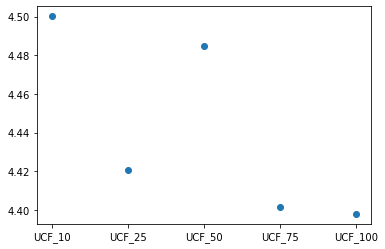

In [39]:
rmse_UCF= pd.DataFrame()
for k in [10,25,50,75,100]:
    ks='UCF_'+str(k)
    realVals=testUCF["Rating"]
    predictedVals=testUCF[ks]
    rmse_UCF.loc[ks,['RMSE']]=mean_squared_error(realVals, predictedVals, squared = False)
rmse_UCF
plt.scatter(rmse_UCF.index,rmse_UCF.RMSE)

In [77]:
rmse_UCF

,RMSE
UCF_10,4.500152
UCF_25,4.420347
UCF_50,4.484620
UCF_75,4.401225
UCF_100,4.397810


Βλεπουμε οτι το μικροτερο RMSE το περνουμε για κ=100 αλλα δεν εχει πολυ μεγαλη διαφορα απο το προηγουμενο.Ο αλγοριθμος πηρε περιπου 10 λεπτα για καθε κ 

In [40]:
# compression_opts = dict(method='zip',archive_name='out2.csv')  
# test.to_csv('out2.zip', index=True,compression=compression_opts)

# Βήμα 4:


Με τον ιδιο τροπο οπως στον UCF αλλα με ανεστραμενο πινακα οπου χριαζεται

In [34]:
def ICF(user,joke,k,X):
    
    mtcu=sp_sparse.csc_matrix(X)
    sj=mtcu.T[user].getnnz(axis=0)
    j=np.where(sj != 0)[0]
    l=len(j)
    
    dataset = pd.DataFrame()
    dataset["joke"]=j
    
    cos_sim=cosine_similarity(mtcu[joke],mtcu[j[0:l]],dense_output=False)
    cos_sim=cos_sim.todense()
    cos_simd=cos_sim.tolist()
    
    rt=X[j[:],user].todense()
    rating=rt.tolist()
    
    dataset["rating"]=np.resize(rating,len(dataset))
    
    dataset["cos_sim"]=np.resize(cos_simd,len(dataset))
    
    dataset= dataset.sort_values(by=["cos_sim"],ascending=False)
    dataset=dataset.reset_index()
    dataset=dataset.drop(["index"],axis=1)
    
    if(dataset.loc[0,'cos_sim']>0.99):
        dataset= dataset.iloc[1:,:]
    
    if len(dataset)>k:
        dataset = dataset.iloc[:k,:]
        
    dataset['numer']=dataset.apply(lambda row: (row['cos_sim']*row['rating']),axis=1)   
    
    rP=dataset.numer.sum()
    Ss=dataset.cos_sim.sum()
    
    x=rP/Ss
    
    del dataset
    
    return(x)

In [35]:
now = datetime.now()
x=ICF(17,20,5,Ru)
after=datetime.now()
delta=after-now
delta
print(x,delta)

-0.38924365832911045 0:00:00.058018


In [43]:
testICF=pd.DataFrame()
testICF["user_id"]=test["user_id"]
testICF["joke_id"]=test["joke_id"]
testICF["Rating"]=test["Rating"]
testICF

,user_id,joke_id,Rating
0,39892,21,-0.281
1,23074,21,3.156
2,23171,21,2.906
3,7282,21,-2.938
4,33970,21,2.656
...,...,...,...
9995,551,62,-9.000
9996,202,20,7.844
9997,17,20,2.656
9998,406,69,8.375


In [44]:
now = datetime.now()
testICF["ICF_1"]=testICF.apply(lambda row: ICF(row['user_id'],row['joke_id'],1,Ru),axis=1)
after=datetime.now()
delta=after-now
print(delta)

0:08:56.353378


In [45]:
now = datetime.now()
testICF["ICF_2"]=testICF.apply(lambda row: ICF(row['user_id'],row['joke_id'],2,Ru),axis=1)
after=datetime.now()
delta=after-now
delta

datetime.timedelta(seconds=529, microseconds=927505)

In [46]:
now = datetime.now()
testICF["ICF_5"]=testICF.apply(lambda row: ICF(row['user_id'],row['joke_id'],5,Ru),axis=1)
after=datetime.now()
delta=after-now
delta

datetime.timedelta(seconds=529, microseconds=107818)

In [47]:
now = datetime.now()
testICF["ICF_7"]=testICF.apply(lambda row: ICF(row['user_id'],row['joke_id'],7,Ru),axis=1)
after=datetime.now()
delta=after-now
delta

datetime.timedelta(seconds=530, microseconds=293815)

In [48]:
now = datetime.now()
testICF["ICF_10"]=testICF.apply(lambda row: ICF(row['user_id'],row['joke_id'],10,Ru),axis=1)
after=datetime.now()
delta=after-now
delta

datetime.timedelta(seconds=525, microseconds=400353)

In [49]:
testICF

,user_id,joke_id,Rating,ICF_1,ICF_2,ICF_5,ICF_7,ICF_10
0,39892,21,-0.281,2.906,3.318429,2.574284,2.349167,1.824396
1,23074,21,3.156,3.750,5.861236,6.492044,6.344456,5.948659
2,23171,21,2.906,-5.719,-2.125297,2.933531,3.394027,3.412464
3,7282,21,-2.938,2.844,1.296507,0.488728,0.988457,1.030627
4,33970,21,2.656,3.188,2.637769,2.528725,2.741876,2.481778
...,...,...,...,...,...,...,...,...
9995,551,62,-9.000,-9.938,-9.427501,-4.581111,-3.772508,-4.644811
9996,202,20,7.844,9.750,9.674067,7.432120,7.691379,7.879288
9997,17,20,2.656,7.000,-0.894606,-0.389244,-0.373256,-0.014944
9998,406,69,8.375,-8.094,-3.987265,-0.562534,-0.564996,0.032632


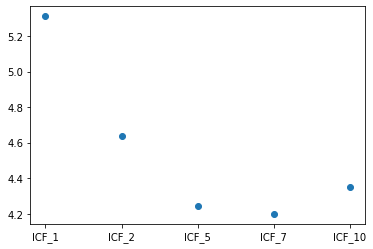

In [50]:
rmse_ICF= pd.DataFrame()
for k in [1,2,5,7,10]:
    ks='ICF_'+str(k)
    realVals=testICF["Rating"]
    predictedVals=testICF[ks]
    rmse_ICF.loc[ks,['RMSE']]=mean_squared_error(realVals, predictedVals, squared = False)
rmse_ICF
plt.scatter(rmse_ICF.index,rmse_ICF.RMSE)

In [78]:
rmse_ICF


,RMSE
ICF_1,5.310546
ICF_2,4.640112
ICF_5,4.246587
ICF_7,4.198937
ICF_10,4.350809


Και εδώ παρατηρούμε οτι για Κ= 7 έχουμε το μικρότερο RMSE.Και αυτός ο αλγόριθμος πηρέ περίπου στα 10 λεπτά για κάθε Κ

#  Βήμα 5:


In [51]:
testSVD=pd.DataFrame()
testSVD["user_id"]=test["user_id"]
testSVD["joke_id"]=test["joke_id"]
testSVD["Rating"]=test["Rating"]
testSVD

,user_id,joke_id,Rating
0,39892,21,-0.281
1,23074,21,3.156
2,23171,21,2.906
3,7282,21,-2.938
4,33970,21,2.656
...,...,...,...
9995,551,62,-9.000
9996,202,20,7.844
9997,17,20,2.656
9998,406,69,8.375


Ακολουθώντας τις οδηγίες από το tutorial ορίσαμε την SVDpredict ώστε να υπολογίσουμε το SVD για τις διάφορες τιμές του Κ

In [52]:
def SVDpredict(k):
    
    ks='SVD_'+str(k)
    U, s, V =sp_linalg.svds(Ru,k,which ='LM')
   
    S = np.diag(s)
    for k in range(k,0,-1):
        data_k=U[:,k:].dot(S[k:,k:]).dot(V[k:,:])

    data_k =U.dot(S).dot(V)
    testSVD[ks]=data_k[testSVD["joke_id"],testSVD["user_id"]]
    return()

In [53]:
for k in range(2,21):
    SVDpredict(k)
testSVD

,user_id,joke_id,Rating,SVD_2,SVD_3,SVD_4,SVD_5,SVD_6,SVD_7,SVD_8,...,SVD_11,SVD_12,SVD_13,SVD_14,SVD_15,SVD_16,SVD_17,SVD_18,SVD_19,SVD_20
0,39892,21,-0.281,0.301734,0.574672,0.905658,0.904598,0.949200,0.933310,0.980190,...,0.858098,1.110004,1.394728,1.454537,1.437608,1.670125,2.070699,1.856424,1.881913,1.284778
1,23074,21,3.156,2.676152,3.097588,3.560750,3.788315,3.803068,3.792569,3.797836,...,4.861922,4.480059,3.702865,2.857807,2.775411,2.031825,-0.023046,0.663525,3.159216,2.541339
2,23171,21,2.906,1.574085,1.837539,2.044072,2.182750,2.174800,2.215772,1.920140,...,1.891157,2.202402,1.511018,1.684080,1.674020,0.559646,1.682866,2.599600,2.618447,2.033610
3,7282,21,-2.938,0.528736,0.250237,0.170146,0.173393,-0.005765,-0.095219,0.016552,...,0.357781,0.247275,0.498461,0.285666,0.336003,0.476627,0.065434,-0.169331,0.206007,0.148498
4,33970,21,2.656,0.517378,0.668712,1.029826,1.043538,1.090629,1.097363,1.451477,...,1.653839,1.695999,1.615698,1.701055,1.686301,1.746083,0.557718,0.603163,0.574617,0.303534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,551,62,-9.000,-0.029593,-0.017067,-0.014013,-0.021755,-0.019276,-0.020445,-0.023512,...,-0.028945,-0.026677,-0.024203,-0.040654,-0.028381,-0.023392,-0.022734,-0.023326,-0.023702,-0.014940
9996,202,20,7.844,0.065806,0.101490,0.102319,0.112594,0.112953,0.113937,0.114421,...,0.120918,0.120625,0.119871,0.134775,0.146344,0.158474,0.156492,0.176493,0.176163,0.177970
9997,17,20,2.656,-0.010263,-0.016938,-0.016404,0.000743,-0.000043,0.004737,0.004904,...,0.006225,0.009181,0.012321,0.010813,0.008992,0.005439,0.007498,0.007671,0.008551,0.013004
9998,406,69,8.375,0.008226,-0.002673,-0.002457,-0.000754,0.000804,0.004839,0.004800,...,0.010421,0.010550,0.010535,0.016644,0.020244,0.023614,0.023645,0.015474,0.017986,0.016443


In [54]:
rmse_SVD= pd.DataFrame()
for k in range(2,21):
    ks='SVD_'+str(k)
    realVals=testSVD["Rating"]
    predictedVals=testSVD[ks]
    rmse_SVD.loc[k,['RMSE']]=mean_squared_error(realVals, predictedVals, squared = False)
rmse_SVD

,RMSE
2,4.735177
3,4.649011
4,4.635153
5,4.636002
6,4.661814
7,4.675156
8,4.681776
9,4.692667
10,4.696880
11,4.710059


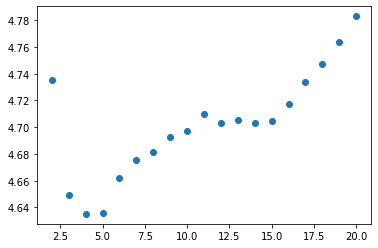

In [55]:
plt.scatter(rmse_SVD.index,rmse_SVD.RMSE)

Από την εφαρμογή του SVD στο πίνακα R για τις διάφορες τιμές του Κ παρατηρούμε ότι για Κ=4 έχουμε το καλύτερο PMSE και για Κ μεγαλύτερο του 5 βλέπουμε ότι το RMSE αυξάνεται

# Βήμα 6:

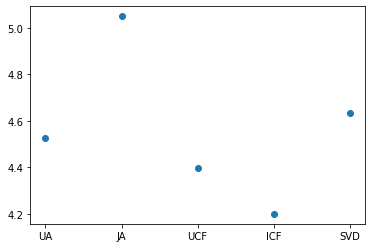

In [76]:
BestRMSE= pd.DataFrame()
BestRMSE.loc['UA','RMSE']=mean_squared_error(test.Rating, test.User_AV, squared = False)
BestRMSE.loc['JA','RMSE']=mean_squared_error(test.Rating, test.joke_AV, squared = False)
BestRMSE.loc['UCF','RMSE']=mean_squared_error(test.Rating, testUCF.UCF_100, squared = False)
BestRMSE.loc['ICF','RMSE']=mean_squared_error(test.Rating, testICF.ICF_7, squared = False)
BestRMSE.loc['SVD','RMSE']=mean_squared_error(test.Rating, testSVD.SVD_4, squared = False)
plt.scatter(BestRMSE.index,BestRMSE.RMSE)

    Έχοντας όλους τους αλγόριθμους μαζί  παρατηρούμε ότι ο ICF έχει το μικρότερο RMSE μετά είναι ο UCF μετά ο UA μετά ο SVD και τέλος ο JA . Βέβαια από αυτούς ο ICF και o UCF αν με τα χαμηλότερα RMSE είναι και αυτοί που πήραν τον περισσότερο χρόνο να ολοκληρωθούν με τον UCF να χρειάζεται 9.26 λεπτά και ο ICF 8..7 λεπτά  για το σύνολο των δεδομένων .Ο SVD  από την άλλη χρειάστηκε περίπου 3-4 λεπτά να υλοποιηθεί Κ φορές στο πλήρες μέγεθος των τεστ δεδομένων κάτι που τον κάνει πολύ γρήγορο UA και JA αν και στιγμιαίοι δεν μπορούν να εφαρμοστούν σε αραιούς πίνακες πράγμα που τους κάνει να μη μπορούν να συναγωνιστούν τους άλλους .Από αυτούς παρατηρούμε ότι υπάρχει μεγαλύτερη συνοχή μεταξύ τον βαθμών ενός χρήστη πάρα ενός αστείου .Για το UCF και τον ICF ίσως με μια καλύτερη υλοποίηση από τη τη δική μου να είναι και ταχύτεροι αλλά δυστυχώς δεν βρήκα κάποιο καλύτερο τρόπο να διαχειριστώ τα δεδομένα μετά τη σύγκριση των διανυσμάτων για την ομοιότητα πέρα από το DataFrame .Δοκίμασα αρκετές παραλλαγές με τους πίνακες ώστε να ελαττώσω το χρόνο που χρειάζονται ,αλλά δε μπόρεσα να υλοποιήσω κάτι γρηγορότερο. 

#   Ερωτηση 4	:

Ακολουθώντας τα βήματα από το tutorial με το clustering εφαρμόζουμε τον Κmeans αλγόριθμο και από το κοινό γράφημα του SSE και το Silhouette Coefficient επιλέγουμε το Κ=3 clusters

In [36]:
error = np.zeros(11)
sh_score = np.zeros(11)
for k in range(2,11):
    kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans.fit_predict(Ru.T)
    error[k] = kmeans.inertia_
    if k>1: sh_score[k]= metrics.silhouette_score(Ru.T, kmeans.labels_)



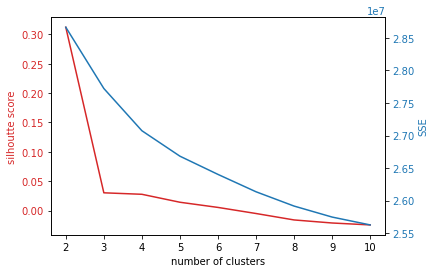

In [37]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhoutte score', color=color)
ax1.plot(range(2,len(sh_score)),sh_score[2:], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('SSE', color=color) # we already handled the x-label with ax1
ax2.plot(range(2,len(error)),error[2:], color=color)
ax2.tick_params(axis='y', labelcolor=color)


    Aπό το κοινό γράφημα του SSE και το Silhouette Coefficient επιλέγουμε το Κ=3 clusters καθως εκει παρατηρουμε την κορυφη του Silhouette Coefficient και αρκετη πτωση του SSE.

In [38]:
testCL=pd.DataFrame()
testCL["user_id"]=test["user_id"]
testCL["joke_id"]=test["joke_id"]
testCL["Rating"]=test["Rating"]
testCL

,user_id,joke_id,Rating
0,39892,21,-0.281
1,23074,21,3.156
2,23171,21,2.906
3,7282,21,-2.938
4,33970,21,2.656
...,...,...,...
9995,551,62,-9.000
9996,202,20,7.844
9997,17,20,2.656
9998,406,69,8.375


#  A.1 Cluster-Based JA(CB_JA)

In [39]:
kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit_predict(Ru.T)
centroids = kmeans.cluster_centers_
kmeans_labels = kmeans.labels_
error = kmeans.inertia_

Για τον CB_JA  στα train  δεδομένα έφτιαξα μια νέα στήλη με το cluster στο οποίο ανήκει  ο χρήστης και για στην υλοποίηση του η ιδέα είναι ότι διαχειρίζομαι  το dataframe σαν να κάνω διαδοχικά groopby ώστε να καταλήξω στην ομάδα χρηστών που θέλω για να πάρω το μέσο όρο του αστείου.

In [40]:
train["cluster"]=0

In [41]:
for k in range(0,3):
    lc=np.where(kmeans_labels==k)[0]
    train["cluster"].iloc[train["user_id"].isin(lc)]=k


C:\Users\ggBoSS\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [42]:
train

,joke_id,user_id,Rating,cluster
0,0,341,-8.906,1
1,0,277,-6.500,2
2,0,229,-9.156,0
3,0,349,1.469,2
4,0,81,-7.281,0
...,...,...,...,...
1082053,138,10484,0.750,0
1082054,138,33636,2.188,2
1082055,138,38377,0.781,0
1082056,138,28445,8.250,1


In [43]:
def CB_JA(user,joke):    
    
    x=train[train['user_id']==user].cluster.values[0]
    temp=train[train["cluster"]==x]
    temp=temp[temp['joke_id']==joke]
    av=temp['Rating'].mean()
    
    del temp
    
    return av


In [44]:
now = datetime.now()
testCL["CB_JA"]=testCL.apply(lambda row: CB_JA(row['user_id'],row['joke_id']),axis=1)
after=datetime.now()
delta=after-now
delta

datetime.timedelta(seconds=136, microseconds=904383)

# A.2 Cluster_Based UCF (CB-UCF)

Για τον CB_UCF  έφτιαξα από πριν τους πίνακες των clusters καθώς μετά από δοκιμές είδα ότι καθυστερεί πολύ ο αλγόριθμος να φτιάχνει κάθε φορά τον πίνακα .και  έτσι ανάλογα με το σε ποιο cluster που βρίσκετε ο χρήστης δίνω τον ανάλογο πίνακα κάθε φορά αλλά αναθέτω και το νέο id του σε αυτό τον πίνακα .

In [45]:
# Ru= sp_sparse.lil_matrix((139,40863))
# Ru[train.joke_id,train.user_id]=train.Rating

lc0=np.where(kmeans_labels==0)[0]
lc1=np.where(kmeans_labels==1)[0]
lc2=np.where(kmeans_labels==2)[0]
Sv0=Ru[:,lc0]
Sv1=Ru[:,lc1]
Sv2=Ru[:,lc2]

In [47]:
def CB_UCF(user,joke):
    if user  in lc0:
        user=int(np. where(lc0 == user)[0])#παιρνω το νεο user_id στο μικροτερο πινακα οπου ειναι και η θεση του σε αυτον
        av=UCF(user,joke,75,Sv0)
    elif user in lc1:
        user=int(np. where(lc1 == user)[0])
        av=UCF(user,joke,75,Sv1)
    elif user in lc2:
        user=int(np. where(lc2 == user)[0])
        av=UCF(user,joke,75,Sv2)
#     else:
#         av=by_joke_AV.iloc[joke].item()
    return (av)
    
# def UCF(user,joke,k,Ru):   

In [48]:
now = datetime.now()
CB_UCF(33635,138)
after=datetime.now()
delta=after-now
delta

datetime.timedelta(microseconds=23006)

In [49]:
now = datetime.now()
testCL["CB_UCF"]=testCL.apply(lambda row: CB_UCF(row['user_id'],row['joke_id']),axis=1)
after=datetime.now()
delta=after-now
delta

datetime.timedelta(seconds=196, microseconds=621298)

In [50]:
testCL

,user_id,joke_id,Rating,CB_JA,CB_UCF
0,39892,21,-0.281,4.020895,4.583647
1,23074,21,3.156,4.020895,4.527517
2,23171,21,2.906,4.020895,4.574577
3,7282,21,-2.938,0.674081,1.147080
4,33970,21,2.656,4.020895,5.326344
...,...,...,...,...,...
9995,551,62,-9.000,-2.179643,37.488672
9996,202,20,7.844,6.137417,6.582758
9997,17,20,2.656,-1.539231,0.245786
9998,406,69,8.375,2.386463,1.544317


In [51]:
realVals = testCL.Rating
predictedVals = testCL["CB_UCF"]

UArmse = mean_squared_error(realVals, predictedVals, squared = False)
UArmse

4.371083039898551

In [52]:
realVals = testCL.Rating
predictedVals = testCL["CB_JA"]

UArmse = mean_squared_error(realVals, predictedVals, squared = False)
UArmse

4.644974638959283

Παρατηρούμε ότι και οι δυο αλγόριθμοι έχουν μικρότερα RMSE από τους αντιστοίχους της ερώτησης 3 και επιπλέον ο CB_UCF χρειάζεται μόλις 3 λεπτά σε σχέση με τα 9 του UCF ανάλογο βέβαια αφού έχουμε 3 πίνακες μικρότερου μεγέθους αρά λιγότερες πράξεις μέσα στον UCF . Επομένως με το clustering πετυχαίνουμε και μικρότερο RMSE αλλά και μικρότερο χρόνο εκτέλεσης κάτι που κάνει τους αλγόριθμους πολύ πιο αποδοτικούς σε μεγάλα δεδομένα .

# Β. Cluster_Based UA (CB_UA)

In [ ]:
Ακολουθώντας και πάλι τα βήματα από το tutorial κάνουμε το clustering και με το κοινό γράφημα βρίσκουμε τον αριθμό των clusters

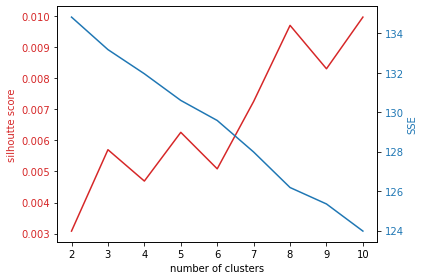

In [58]:
jokedf = pd.read_csv('jokes.csv')

vectorizer = sk_text.TfidfVectorizer(stop_words='english')
text = vectorizer.fit_transform(jokedf["joke_text"])


error1 = np.zeros(11)
sh_score1 = np.zeros(11)
for k in range(2,11):
    kmeans1 = sk_cluster.KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans1.fit_predict(text)
    error1[k] = kmeans1.inertia_
    sh_score1[k]= metrics.silhouette_score(text, kmeans1.labels_)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('number of clusters')\

ax1.set_ylabel('silhoutte score', color=color)
ax1.plot(range(2,len(sh_score1)),sh_score1[2:], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('SSE', color=color) # we already handled the x-label with ax1
ax2.plot(range(2,len(error1)),error1[2:], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()

Μετά από πολλές επαναλήψεις για το γράφημα τις περισσότερες φορές εμφανίζετε κορυφή του silhoutte  για Κ = 8

In [92]:
jokedf


,joke_id,joke_text
0,1,Q. What's O. J. Simpson's web address? A. Slas...
1,2,How many feminists does it take to screw in a ...
2,3,Q. Did you hear about the dyslexic devil worsh...
3,4,They asked the Japanese visitor if they have e...
4,5,Q: What did the blind person say when given so...
...,...,...
134,135,"A blonde, brunette, and a red head are all lin..."
135,136,America: 8:00 - Welcome to work! 12:00 - Lunch...
136,137,It was the day of the big sale. Rumors of the ...
137,138,"Recently a teacher, a garbage collector, and a..."


In [93]:
kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=8, n_init=10)
kmeans.fit_predict(text)
centroids = kmeans.cluster_centers_
kmeans_labels = kmeans.labels_
error = kmeans.inertia_

In [94]:
train["cluster_J"]=0

In [95]:
kmeans_labels

array([0, 4, 3, 0, 3, 7, 4, 1, 7, 6, 6, 2, 0, 0, 1, 7, 6, 5, 1, 6, 6, 3,
       3, 0, 1, 1, 2, 2, 3, 4, 1, 3, 1, 2, 2, 3, 5, 2, 5, 3, 6, 0, 2, 2,
       1, 1, 0, 4, 0, 3, 3, 5, 3, 0, 7, 7, 1, 1, 2, 7, 5, 2, 6, 4, 6, 3,
       0, 6, 5, 1, 3, 1, 3, 6, 4, 2, 3, 3, 0, 4, 7, 3, 5, 1, 2, 7, 1, 7,
       0, 6, 3, 7, 3, 5, 1, 5, 0, 3, 2, 2, 7, 3, 7, 6, 4, 0, 5, 3, 7, 7,
       2, 7, 2, 1, 2, 2, 2, 0, 2, 3, 7, 7, 7, 3, 3, 7, 6, 6, 6, 3, 5, 3,
       3, 2, 3, 5, 7, 0, 2])

In [96]:
for k in range(0,8):
    lc=np.where(kmeans_labels==k)[0]
    train["cluster_J"].iloc[train["joke_id"].isin(lc)]=k


C:\Users\ggBoSS\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Για τον αλγόριθμο υλοποίησα όμοια με τον CB_JA του 4.Α

In [97]:
def CB_UA(user,joke):    
    
    x=train[train['joke_id']==joke].cluster.values[0]
    temp=train[train["cluster_J"]==x]
    temp=temp[temp['user_id']==user]
    temp
    av=temp['Rating'].mean()
    if math.isnan(av) :
        av=by_user_AV.iloc[int(user)].item()
        
    del temp
    return av


In [98]:
now = datetime.now()
testCL["CB_UA"]=testCL.apply(lambda row: CB_UA(row['user_id'],row['joke_id']),axis=1)
after=datetime.now()
delta=after-now
delta

datetime.timedelta(seconds=63, microseconds=487839)

In [99]:
testCL

,user_id,joke_id,Rating,CB_JA,CB_UCF,CB_UA
0,39892,21,-0.281,4.020895,4.583647,2.469000
1,23074,21,3.156,4.020895,4.527517,5.824800
2,23171,21,2.906,4.020895,4.574577,1.987400
3,7282,21,-2.938,0.674081,1.147080,0.427000
4,33970,21,2.656,4.020895,5.326344,1.771000
...,...,...,...,...,...,...
9995,551,62,-9.000,-2.179643,37.488672,-4.476750
9996,202,20,7.844,6.137417,6.582758,5.653200
9997,17,20,2.656,-1.539231,0.245786,3.078000
9998,406,69,8.375,2.386463,1.544317,0.968846


In [100]:
realVals = testCL.Rating
predictedVals = testCL["CB_UA"]

UArmse = mean_squared_error(realVals, predictedVals, squared = False)
UArmse

5.042294630853547

Παρατηρούμε ότι παρόλο το clustering  το RMSE είναι μεγαλύτερο από  αυτό  του UA της άσκησης 3.
Ίσως δεν έκανα σωστή επιλογή του κ αλλά με το γράφημα του SSE-Silhoutte  δεν είναι εμφανή η σωστή επιλογή του σε αυτή τη περίπτωση .
